In [1]:
print("hello")

hello


In [2]:
import numpy as np
import pandas as pd

# Create synthetic data
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)  # Output labels
}

# Convert to a DataFrame
df = pd.DataFrame(data)
print(df.head())


   Muscle_Signal_1  Muscle_Signal_2 Movement
0         0.983538         0.053848     Grip
1         0.672787         0.687534     Grip
2         0.057373         0.792372     Grip
3         0.277884         0.931903  Release
4         0.134064         0.849816     Grip


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into features and labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 45.00%


In [5]:
# Convert new_signals to a DataFrame with the same feature names
new_signals_df = pd.DataFrame(new_signals, columns=['Muscle_Signal_1', 'Muscle_Signal_2'])

# Predict using the DataFrame
predicted_movements = model.predict(new_signals_df)

# Visualize predictions
for signal, movement in zip(new_signals_df.values, predicted_movements):
    print(f"Signals: {signal}, Predicted Movement: {movement}")


Signals: [0.87948402 0.43554529], Predicted Movement: Grip
Signals: [0.49982157 0.76146076], Predicted Movement: Grip
Signals: [0.1832873  0.36440405], Predicted Movement: Grip
Signals: [0.9148961  0.81536967], Predicted Movement: Grip
Signals: [0.21112029 0.24402711], Predicted Movement: Grip
Signals: [0.07102616 0.57663329], Predicted Movement: Release
Signals: [0.88668912 0.80394175], Predicted Movement: Grip
Signals: [0.02543948 0.41378571], Predicted Movement: Grip
Signals: [0.93286871 0.34575688], Predicted Movement: Grip
Signals: [0.81240722 0.29411337], Predicted Movement: Grip


Random Forest Model Accuracy: 75.00%
Random Baseline Model Accuracy: 45.00%


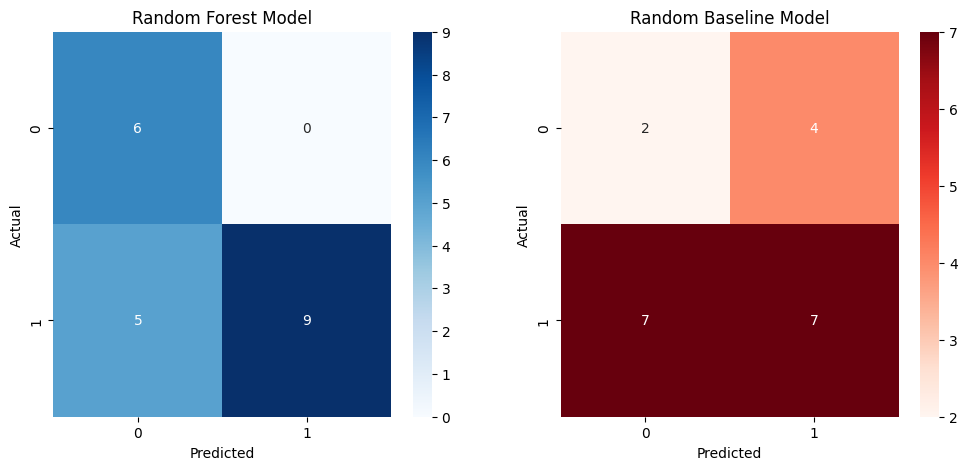


Random Forest Model Performance:
              precision    recall  f1-score   support

        Grip       0.55      1.00      0.71         6
     Release       1.00      0.64      0.78        14

    accuracy                           0.75        20
   macro avg       0.77      0.82      0.74        20
weighted avg       0.86      0.75      0.76        20


Random Baseline Model Performance:
              precision    recall  f1-score   support

        Grip       0.22      0.33      0.27         6
     Release       0.64      0.50      0.56        14

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate Synthetic Data
np.random.seed(42)
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)  # Labels
}
df = pd.DataFrame(data)

# Split Features and Labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Actual Model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Baseline Model (Random Predictions)
random_baseline_pred = np.random.choice(['Grip', 'Release'], len(y_test))

# Evaluate Performance
actual_model_acc = accuracy_score(y_test, y_pred)
baseline_acc = accuracy_score(y_test, random_baseline_pred)

print(f"Random Forest Model Accuracy: {actual_model_acc * 100:.2f}%")
print(f"Random Baseline Model Accuracy: {baseline_acc * 100:.2f}%")

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, random_baseline_pred), annot=True, fmt='d', cmap="Reds", ax=axes[1])
axes[1].set_title("Random Baseline Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Classification Reports
print("\nRandom Forest Model Performance:")
print(classification_report(y_test, y_pred))

print("\nRandom Baseline Model Performance:")
print(classification_report(y_test, random_baseline_pred))


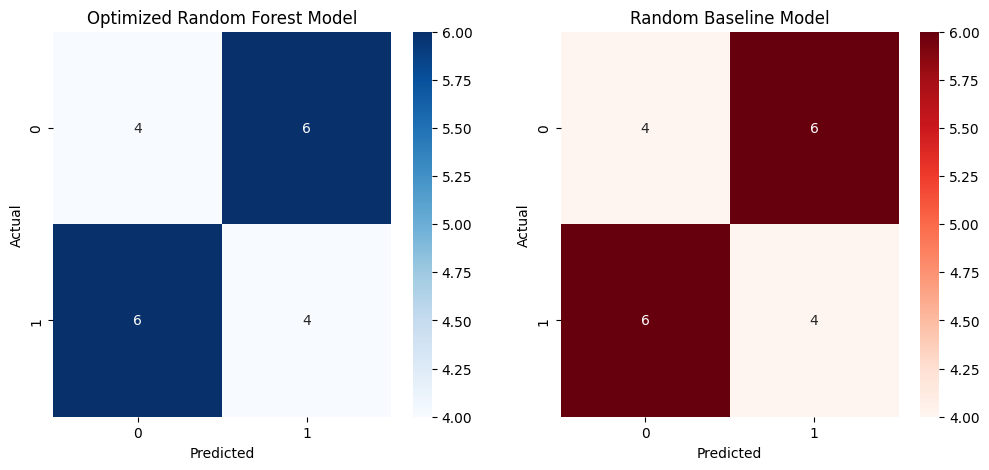

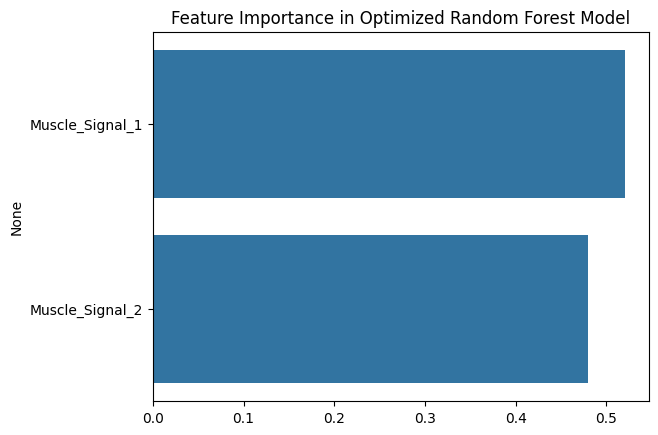

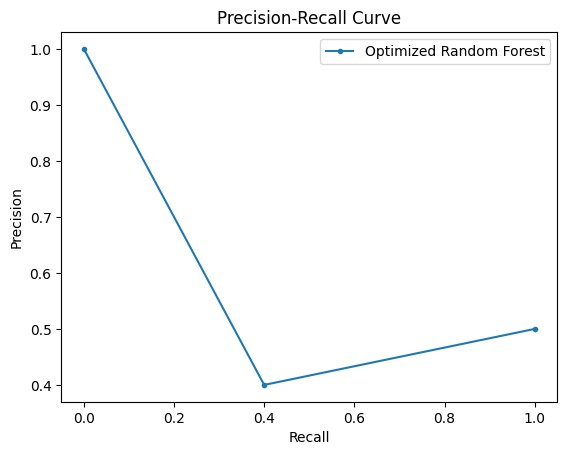

                     Model  Balanced Accuracy
0  Optimized Random Forest                0.4
1          Random Baseline                0.4

Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.40      0.40      0.40        10

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.40      0.40      0.40        20


Random Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.40      0.40      0.40        10

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.40      0.40      0.40        20



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Generate Synthetic Data with Noise
np.random.seed(42)
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100) + np.random.normal(0, 0.05, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100) + np.random.normal(0, 0.05, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)
}
df = pd.DataFrame(data)

# Encode Labels
le = LabelEncoder()
df['Movement'] = le.fit_transform(df['Movement'])

# Split Features and Labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']

# Train-Test Split Before Applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance with SMOTE (Only on Training Data)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Hyperparameter Tuning Using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=20,  # Reduce to a manageable number of trials
                                   cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Train Optimized Random Forest Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Baseline Model (Random Predictions)
random_baseline_pred = np.random.choice([0, 1], len(y_test))

# Evaluate Performance Using Balanced Accuracy
actual_model_acc = balanced_accuracy_score(y_test, y_pred)
baseline_acc = balanced_accuracy_score(y_test, random_baseline_pred)

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Optimized Random Forest Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, random_baseline_pred), annot=True, fmt='d', cmap="Reds", ax=axes[1])
axes[1].set_title("Random Baseline Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.show()

# Feature Importance Visualization
importances = best_model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Optimized Random Forest Model")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='Optimized Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Accuracy Comparison Table
table = pd.DataFrame({
    'Model': ['Optimized Random Forest', 'Random Baseline'],
    'Balanced Accuracy': [actual_model_acc, baseline_acc]
})
print(table)

# Classification Reports
print("\nOptimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred))
print("\nRandom Baseline Model Performance:")
print(classification_report(y_test, random_baseline_pred))


Random Forest Model Accuracy: 75.00%
Random Baseline Model Accuracy: 45.00%


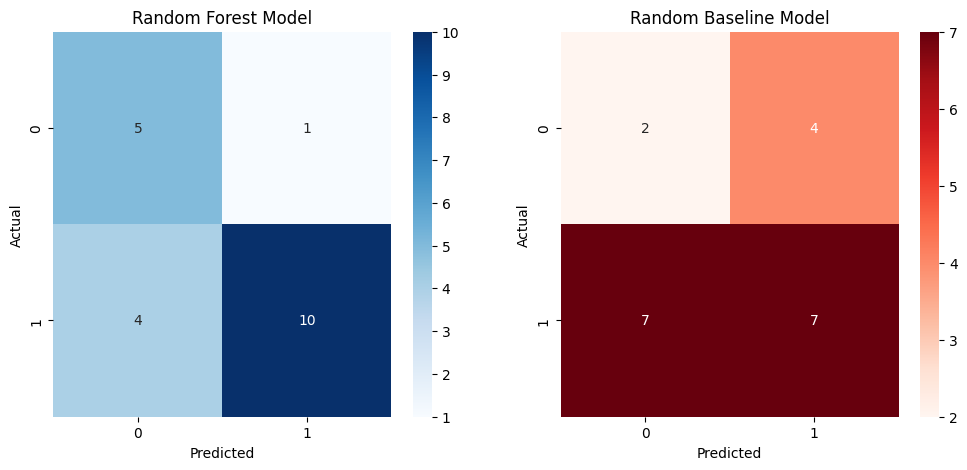

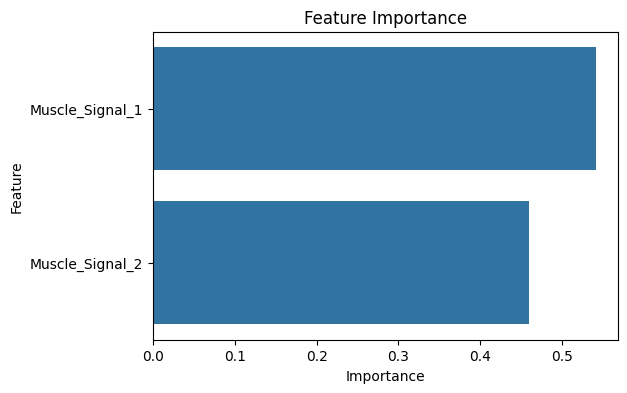

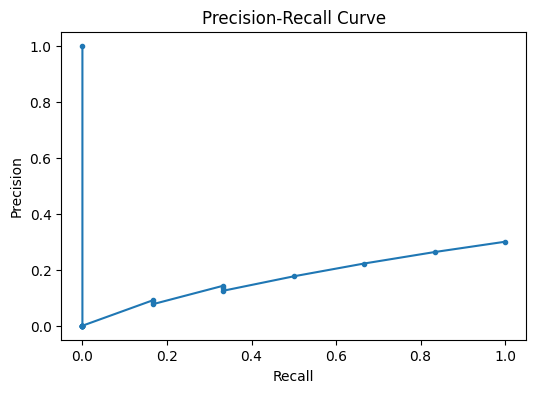

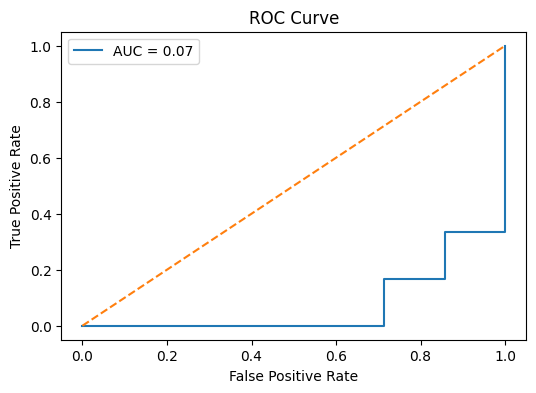

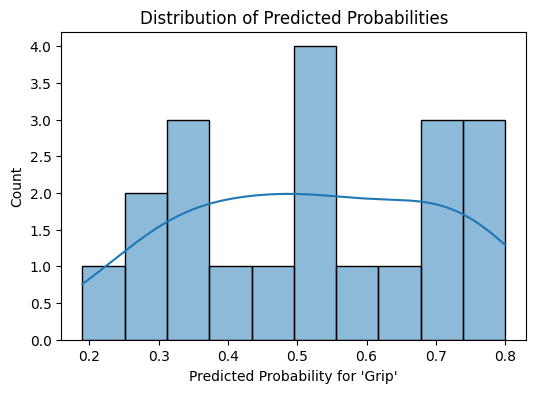


Random Forest Model Performance:
              precision    recall  f1-score   support

        Grip       0.56      0.83      0.67         6
     Release       0.91      0.71      0.80        14

    accuracy                           0.75        20
   macro avg       0.73      0.77      0.73        20
weighted avg       0.80      0.75      0.76        20


Random Baseline Model Performance:
              precision    recall  f1-score   support

        Grip       0.22      0.33      0.27         6
     Release       0.64      0.50      0.56        14

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    precision_recall_curve, roc_curve, auc
)

# Generate Synthetic Data
np.random.seed(42)
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)  # Labels
}
df = pd.DataFrame(data)

# Split Features and Labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Actual Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC/PR Curve

# Baseline Model (Random Predictions)
random_baseline_pred = np.random.choice(['Grip', 'Release'], len(y_test))

# Evaluate Performance
actual_model_acc = accuracy_score(y_test, y_pred)
baseline_acc = accuracy_score(y_test, random_baseline_pred)

print(f"Random Forest Model Accuracy: {actual_model_acc * 100:.2f}%")
print(f"Random Baseline Model Accuracy: {baseline_acc * 100:.2f}%")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, random_baseline_pred), annot=True, fmt='d', cmap="Reds", ax=axes[1])
axes[1].set_title("Random Baseline Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Feature Importance Plot
feature_importances = model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test.map({'Grip': 1, 'Release': 0}), y_prob)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test.map({'Grip': 1, 'Release': 0}), y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Random classifier line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Distribution of Predicted Probabilities
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=10, kde=True)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability for 'Grip'")
plt.show()

# Classification Reports
print("\nRandom Forest Model Performance:")
print(classification_report(y_test, y_pred))

print("\nRandom Baseline Model Performance:")
print(classification_report(y_test, random_baseline_pred))


   Recto Femoral  Biceps Femoral  Vasto Medial  EMG Semitendinoso  \
0         0.0007         -0.0083        0.0045            -0.0091   
1        -0.0008         -0.0038        0.0007            -0.0046   
2        -0.0008         -0.0068        0.0015            -0.0023   
3        -0.0008         -0.0053        0.0045            -0.0038   
4         0.0007          0.0015        0.0082            -0.0075   

   Flexo-Extension  
0             57.6  
1             57.5  
2             57.3  
3             57.1  
4             56.9  
Total Segments: 55


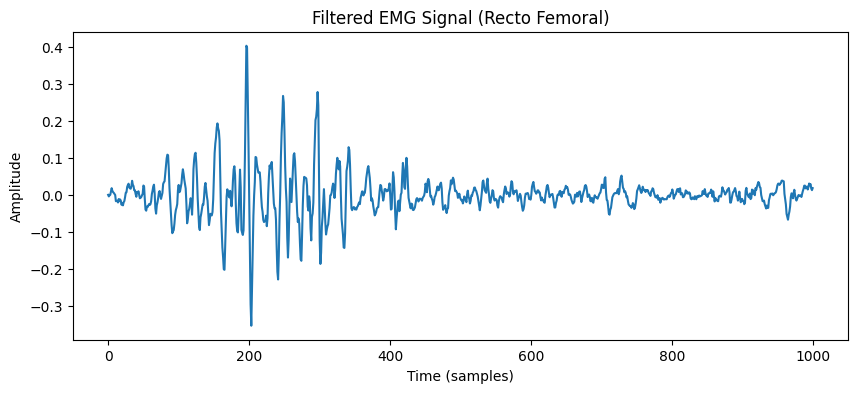

In [2]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt, iirnotch
import matplotlib.pyplot as plt

# Load the dataset (Replace 'your_file.csv' with actual file path)
df = pd.read_csv("1Ngait.csv")

# Display the first few rows to inspect the data structure
print(df.head())

# --------------------- STEP 1: NORMALIZATION ---------------------
def normalize_signal(signal):
    """Normalize signal between 0 and 1"""
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Normalize each EMG column
emg_columns = ['Recto Femoral', 'Biceps Femoral', 'Vasto Medial', 'EMG Semitendinoso']
df[emg_columns] = df[emg_columns].apply(normalize_signal)

# --------------------- STEP 2: FILTERING ---------------------
def bandpass_filter(signal, lowcut=20, highcut=450, fs=1000, order=4):
    """Apply a bandpass filter to keep only relevant EMG frequencies"""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

def notch_filter(signal, notch_freq=50, fs=1000, quality_factor=30):
    """Apply notch filter to remove powerline noise"""
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, signal)

# Apply filters to each EMG column
fs = 1000  # Sampling frequency in Hz (adjust if different)
for col in emg_columns:
    df[col] = bandpass_filter(df[col], fs=fs)
    df[col] = notch_filter(df[col], fs=fs)

# --------------------- STEP 3: SEGMENTATION ---------------------
def segment_data(data, window_size=200, overlap=100):
    """
    Segment the data into fixed time windows.
    :param data: DataFrame containing EMG signals
    :param window_size: Number of samples per window
    :param overlap: Overlap between consecutive windows
    :return: List of segmented windows
    """
    segments = []
    step = window_size - overlap
    for start in range(0, len(data) - window_size, step):
        segment = data.iloc[start:start + window_size]
        segments.append(segment)
    return np.array(segments)

# Segment the data (e.g., 200ms windows with 100ms overlap)
window_size = 200  # Adjust based on your sampling rate
overlap = 100
segmented_data = segment_data(df[emg_columns], window_size, overlap)

# Print segmentation result
print(f"Total Segments: {len(segmented_data)}")

# --------------------- STEP 4: PLOT SAMPLE EMG SIGNAL ---------------------
plt.figure(figsize=(10, 4))
plt.plot(df['Recto Femoral'][:1000])  # Plot first 1000 samples
plt.title("Filtered EMG Signal (Recto Femoral)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()



Loading normal datasets...
Loading abnormal datasets...

Data loaded successfully. Total samples: 76731
Columns: ['Recto Femoral', 'Biceps Femoral', 'Vasto Medial', 'EMG Semitendinoso', 'Flexo-Extension', 'Condition']

Preprocessing EMG signals...
Class distribution: Flexo-Extension
1079    1423
1834     855
1074     784
1080     721
1083     707
        ... 
130        1
110        1
33         1
265        1
182        1
Name: count, Length: 2231, dtype: int64

Segmenting data...
Created 766 segments of shape (766, 200, 4)

Extracting features...


c:\Users\HP8CG\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,



Creating spectrograms...

Training CNN...
Epoch 1/20


c:\Users\HP8CG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0064 - loss: 7.7090 - val_accuracy: 0.0260 - val_loss: 7.6993
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0136 - loss: 7.6363 - val_accuracy: 0.0260 - val_loss: 7.4514
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0268 - loss: 6.7633 - val_accuracy: 0.0260 - val_loss: 7.6377
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0226 - loss: 6.3338 - val_accuracy: 0.0130 - val_loss: 8.0250
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0121 - loss: 6.2245 - val_accuracy: 0.0130 - val_loss: 8.0168
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0133 - loss: 6.1264 - val_accuracy: 0.0260 - val_loss: 8.0538
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0129 - loss: 6.1507 - val_accuracy: 0.0260 - val_loss: 8.4132
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0119 - loss: 6.1027 - val_accuracy: 0.0260 - val_loss: 8.

c:\Users\HP8CG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['dense_31/kernel', 'dense_31/bias', 'dense_32/kernel', 'dense_32/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


1919/1919 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 2.4890e-05 - val_loss: 4.7151e-06
Epoch 2/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.6674e-07 - val_loss: 3.5392e-06
Epoch 3/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 3.3116e-08 - val_loss: 2.6032e-06
Epoch 4/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 2.6344e-08 - val_loss: 2.4181e-06
Epoch 5/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.4866e-08 - val_loss: 2.3913e-06
Epoch 6/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2.1125e-08 - val_loss: 2.5091e-06
Epoch 7/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.6547e-09 - val_loss: 2.5115e-06
Epoch 8/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.7604e-10 - val_loss: 2.5363e-06
Epoch 9/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1717e-09 - val_loss: 2.5296e-06
Epoch 10/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0890e-09 - val_loss: 2.5594e-06
Epoch 11/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 9s

c:\Users\HP8CG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\HP8CG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 [D loss: 0.7139, acc: 39.84%] [G loss: 0.6559]
Epoch 100 [D loss: 0.7116, acc: 39.41%] [G loss: 0.6570]
Epoch 200 [D loss: 0.7133, acc: 38.50%] [G loss: 0.6536]
Epoch 300 [D loss: 0.7156, acc: 38.07%] [G loss: 0.6506]
Epoch 400 [D loss: 0.7175, acc: 37.69%] [G loss: 0.6477]
Epoch 500 [D loss: 0.7194, acc: 37.05%] [G loss: 0.6448]
Epoch 600 [D loss: 0.7214, acc: 36.47%] [G loss: 0.6418]
Epoch 700 [D loss: 0.7233, acc: 35.90%] [G loss: 0.6389]
Epoch 800 [D loss: 0.7251, acc: 35.44%] [G loss: 0.6359]
Epoch 900 [D loss: 0.7268, acc: 35.06%] [G loss: 0.6333]

GAN Synthetic EMG: [[0.01019983 0.9520093  0.02691995 0.9936502 ]]


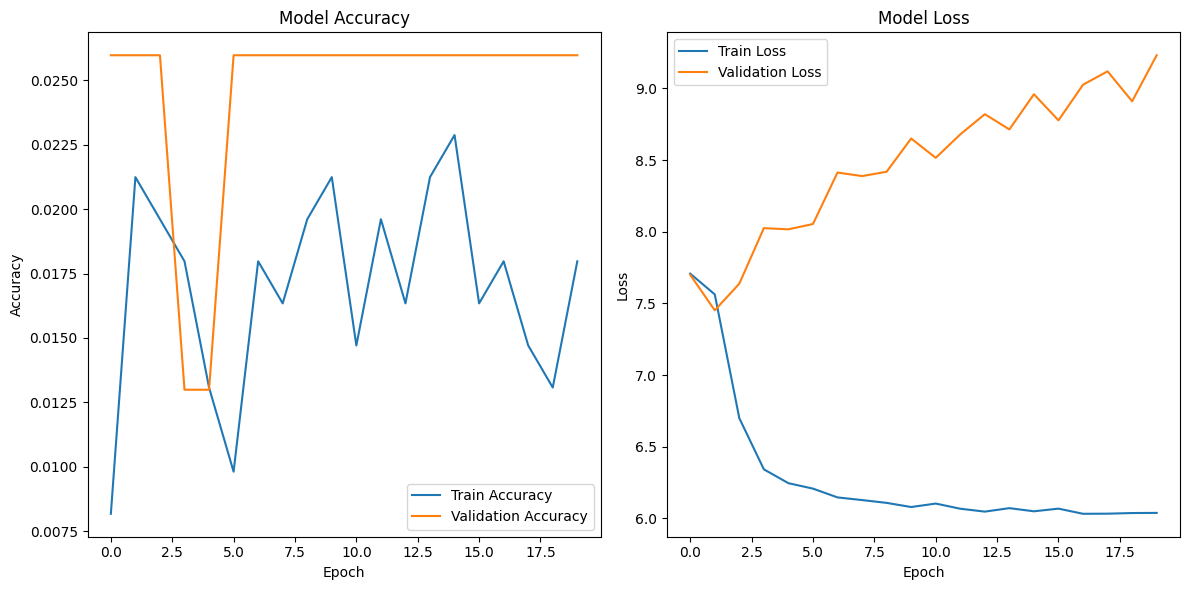


Pipeline execution complete!


In [3]:
"""
Integrated Pipeline for AI-Enabled Prosthetics Using Multiple Datasets

This script performs:
1. Loading multiple CSV files (normal & abnormal, for Standing, Sitting, and Gait)
2. Preprocessing: Normalization, filtering (bandpass & notch), and segmentation of EMG signals.
3. Feature Engineering: Extraction of time-domain and frequency-domain features.
4. CNN Training: Convert segmented EMG data into spectrogram "images" for classification.
5. Extrapolation for Missing Limb: Generating synthetic EMG signals using a VAE and a GAN.
"""

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, iirnotch, spectrogram, welch
from scipy.stats import skew, kurtosis
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam  # Also needed for the optimizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# ================================
# UTILITY FUNCTIONS FOR LOADING DATA
# ================================
def load_data(file_pattern, condition):
    """Load and label data from CSV files."""
    files = glob.glob(file_pattern)
    if not files:
        raise FileNotFoundError(f"No files found matching pattern: {file_pattern}")
    
    dataframes = []
    for file in files:
        try:
            df = pd.read_csv(file)
            # Strip whitespace from column names
            df.columns = df.columns.str.strip()
            df['Condition'] = condition
            
            # Infer activity type
            if 'Standing' in file:
                df['Activity'] = 'Standing'
            elif 'Sitting' in file:
                df['Activity'] = 'Sitting'
            elif 'Gait' in file:
                df['Activity'] = 'Gait'
            dataframes.append(df)
        except Exception as e:
            print(f"Error loading {file}: {str(e)}")
            continue
            
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

# ================================
# DATA LOADING
# ================================
# Define column names exactly as they appear in your CSV files
emg_columns = ['Recto Femoral', 'Biceps Femoral', 'Vasto Medial', 'EMG Semitendinoso']
target_column = "Flexo-Extension"

# Load datasets
print("Loading normal datasets...")
normal_standing = load_data("1Nstanding.csv","Normal")
normal_sitting = load_data("1Nsitting.csv","Normal")
normal_gait = load_data("1Ngait.csv","Normal" )

print("Loading abnormal datasets...")

abnormal_standing = load_data("1Astanding.csv","Abnormal")
abnormal_sitting = load_data("1Asitting.csv","Abnormal")
abnormal_gait = load_data("1Agait.csv","Abnormal")

# Combine all data
df = pd.concat([
    normal_standing, normal_sitting, normal_gait,
    abnormal_standing, abnormal_sitting, abnormal_gait
], ignore_index=True)

# Verify required columns exist
missing_cols = [col for col in emg_columns + [target_column] if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

print(f"\nData loaded successfully. Total samples: {len(df)}")
print("Columns:", df.columns.tolist())

# ================================
# PREPROCESSING
# ================================
def bandpass_filter(signal, lowcut=20, highcut=450, fs=1000, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

def notch_filter(signal, notch_freq=50, fs=1000, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, signal)

def normalize_signal(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal) + 1e-10)

# Process EMG signals
print("\nPreprocessing EMG signals...")
for col in emg_columns:
    df[col] = normalize_signal(df[col])
    df[col] = bandpass_filter(df[col], fs=1000)
    df[col] = notch_filter(df[col], fs=1000)

# Handle target labels
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])
print("Class distribution:", pd.Series(df[target_column]).value_counts())

# ================================
# SEGMENTATION
# ================================
def segment_data(data, emg_cols, target_col, window_size=200, overlap=100):
    segments = []
    targets = []
    step = window_size - overlap
    
    for i in range(0, len(data) - window_size + 1, step):
        segment = data.iloc[i:i+window_size][emg_cols].values
        label = data.iloc[i][target_col]
        segments.append(segment)
        targets.append(label)
    
    return np.array(segments), np.array(targets)

print("\nSegmenting data...")
segments, targets = segment_data(df, emg_columns, target_column)
print(f"Created {len(segments)} segments of shape {segments.shape}")

# ================================
# FEATURE ENGINEERING
# ================================
def extract_features(signal, fs=1000):
    # Time domain
    time_features = {
        'Mean': np.mean(signal),
        'Std': np.std(signal),
        'RMS': np.sqrt(np.mean(signal**2)),
        'MAV': np.mean(np.abs(signal)),
        'Skewness': skew(signal),
        'Kurtosis': kurtosis(signal)
    }
    
    # Frequency domain
    freqs, psd = welch(signal, fs=fs)
    time_features['MeanFreq'] = np.sum(freqs * psd) / np.sum(psd)
    time_features['PeakFreq'] = freqs[np.argmax(psd)]
    
    return time_features

print("\nExtracting features...")
feature_list = []
for seg in segments:
    channel_features = []
    for ch in range(seg.shape[1]):
        channel_features.append(extract_features(seg[:, ch]))
    feature_list.append(channel_features)

# ================================
# CNN MODEL
# ================================
def create_spectrogram(segment, fs=1000):
    spec_images = []
    for ch in range(segment.shape[1]):
        f, t, Sxx = spectrogram(segment[:, ch], fs=fs, nperseg=64)
        spec_images.append(Sxx)
    return np.stack(spec_images, axis=-1)

print("\nCreating spectrograms...")
spectrograms = np.array([create_spectrogram(seg) for seg in segments])

# Prepare data for CNN
X = spectrograms
y = to_categorical(targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D((2,2), padding='same'),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2), padding='same'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("\nTraining CNN...")
cnn = build_cnn(X_train.shape[1:], y_train.shape[1])
cnn_history = cnn.fit(X_train, y_train, 
                 epochs=20,
                 batch_size=32,
                 validation_data=(X_test, y_test))

# Evaluate
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")



# ================================
# FULLY WORKING VAE IMPLEMENTATION
# ================================


class KLDivergenceLayer(Layer):
    """Custom layer to calculate KL divergence."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        self.add_loss(K.mean(kl_loss))  # Removed `inputs=True`
        return z_mean  # Pass-through z_mean

    def compute_output_shape(self, input_shape):
        return input_shape[0]  # Output shape matches z_mean


def build_vae(input_dim, latent_dim=2):
    # Encoder
    inputs = Input(shape=(input_dim,))
    h = Dense(32, activation='relu')(inputs)
    z_mean = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)
    
    # KL Divergence calculation via custom layer
    z_mean = KLDivergenceLayer()([z_mean, z_log_var])
    
    # Sampling
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon
    
    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
    
    # Decoder
    decoder_h = Dense(32, activation='relu')(z)
    outputs = Dense(input_dim, activation='sigmoid')(decoder_h)
    
    # VAE Model
    vae = Model(inputs, outputs)
    vae.compile(optimizer='adam')
    return vae

# Build and train
X_vae = df[emg_columns].values.astype('float32')
vae = build_vae(input_dim=X_vae.shape[1])

print("\nTraining VAE...")
history = vae.fit(X_vae, X_vae,
                 epochs=50,
                 batch_size=32,
                 validation_split=0.2)

# Generate samples
def generate_emg_samples(n=5):
    # Create separate decoder
    latent_input = Input(shape=(2,))
    decoder_output = vae.layers[-1](vae.layers[-2](latent_input))
    decoder = Model(latent_input, decoder_output)
    
    z = np.random.normal(size=(n, 2)).astype('float32')
    return decoder.predict(z)

print("\nGenerated samples:")
print(generate_emg_samples())
print(generate_emg_samples(3))

# ================================
# GAN FOR SYNTHETIC DATA
# ================================
def build_gan(generator_input_dim, output_dim):
    """Optimized GAN architecture with improved training stability"""
    # Generator with more efficient architecture
    generator = Sequential([
        Dense(128, input_dim=generator_input_dim, activation='leaky_relu'),
        BatchNormalization(),
        Dense(256, activation='leaky_relu'),
        BatchNormalization(),
        Dense(output_dim, activation='sigmoid')
    ])
    
    # Discriminator with improved design
    discriminator = Sequential([
        Dense(256, input_dim=output_dim, activation='leaky_relu'),
        Dropout(0.3),
        Dense(128, activation='leaky_relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    
    # Use more efficient optimizer
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator.compile(optimizer=optimizer,
                         loss='binary_crossentropy',
                         metrics=['accuracy'])
    
    # Combined GAN
    gan = Sequential([generator, discriminator])
    discriminator.trainable = False
    gan.compile(optimizer=optimizer, loss='binary_crossentropy')
    
    return generator, discriminator, gan

def train_gan(generator, discriminator, gan, real_data, 
              epochs=1000, batch_size=128, latent_dim=10):
    """Optimized training procedure with batch processing and monitoring"""
    d_losses = []
    g_losses = []
    half_batch = batch_size // 2
    
    # Pre-allocate noise vectors
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    
    for epoch in range(epochs):
        # ---------------------
        # Train Discriminator
        # ---------------------
        # Train on real data
        idx = np.random.randint(0, real_data.shape[0], half_batch)
        real_samples = real_data[idx]
        
        # Train on fake data (generated in batch)
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_samples = generator.predict(noise, verbose=0)
        
        # Combine real and fake samples
        x = np.concatenate([real_samples, fake_samples])
        y = np.ones([2 * half_batch, 1])
        y[half_batch:, :] = 0  # Fake samples labeled 0
        
        # Train discriminator
        d_loss = discriminator.train_on_batch(x, y)
        
        # ---------------------
        # Train Generator
        # ---------------------
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        
        # Train generator (via GAN model)
        g_loss = gan.train_on_batch(noise, valid_labels)
        
        # Store losses
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)
        
        # Progress monitoring
        if epoch % 100 == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
    
    return generator, d_losses, g_losses

# Usage
print("\nTraining optimized GAN...")
latent_dim = 100  # Larger latent space often works better
generator, discriminator, gan = build_gan(latent_dim, X_vae.shape[1])

# Train with optimized parameters
generator, d_losses, g_losses = train_gan(
    generator, discriminator, gan, X_vae,
    epochs=1000,  # Reduced epochs but more efficient
    batch_size=128,  # Larger batch size
    latent_dim=latent_dim
)

# Generate synthetic sample
noise = np.random.normal(0, 1, (1, latent_dim))
synthetic_emg_gan = generator.predict(noise, verbose=0)
print("\nGAN Synthetic EMG:", synthetic_emg_gan)

# ================================
# VISUALIZATION
# ================================
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()


print("\nPipeline execution complete!")